<a href="https://colab.research.google.com/github/denverkim/LIG/blob/main/CNN%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EA%B3%A0%EC%96%91%EC%9D%B4%EC%99%80_%EA%B0%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고양이와 개 이미지 분류하기

In [ ]:
# 다운로드
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-07-24 11:21:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 142.251.31.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   173MB/s    in 0.4s    

2022-07-24 11:21:51 (173 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
#압축풀기
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# 경로지정
base_dir = '/tmp/cats_and_dogs_filtered' # 기본 경로

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir) 

# 파일이름
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

# 파일갯수
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

In [ ]:
# 이미지 확인
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# 이미지 전처리
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 모델생성
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
# 모델 컴파일
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# 모델 훈련
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2,
                    callbacks=[earlystopping])

Epoch 1/100
100/100 - 20s - loss: 0.8229 - accuracy: 0.5490 - val_loss: 0.6479 - val_accuracy: 0.6400 - 20s/epoch - 197ms/step
Epoch 2/100
100/100 - 8s - loss: 0.6305 - accuracy: 0.6520 - val_loss: 0.5836 - val_accuracy: 0.6950 - 8s/epoch - 81ms/step
Epoch 3/100
100/100 - 8s - loss: 0.5448 - accuracy: 0.7205 - val_loss: 0.5523 - val_accuracy: 0.7110 - 8s/epoch - 81ms/step
Epoch 4/100
100/100 - 8s - loss: 0.5033 - accuracy: 0.7625 - val_loss: 0.5653 - val_accuracy: 0.7230 - 8s/epoch - 81ms/step
Epoch 5/100
100/100 - 9s - loss: 0.4042 - accuracy: 0.8145 - val_loss: 0.6556 - val_accuracy: 0.7080 - 9s/epoch - 87ms/step
Epoch 6/100
100/100 - 8s - loss: 0.3376 - accuracy: 0.8400 - val_loss: 0.7147 - val_accuracy: 0.7250 - 8s/epoch - 84ms/step
Epoch 7/100
100/100 - 8s - loss: 0.2645 - accuracy: 0.8910 - val_loss: 0.7270 - val_accuracy: 0.7080 - 8s/epoch - 83ms/step
Epoch 8/100
100/100 - 14s - loss: 0.1827 - accuracy: 0.9335 - val_loss: 1.0131 - val_accuracy: 0.7030 - 14s/epoch - 139ms/step


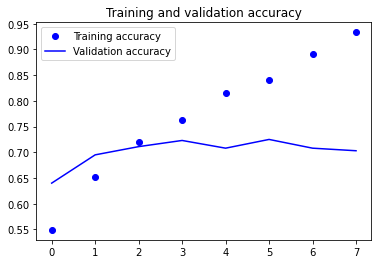

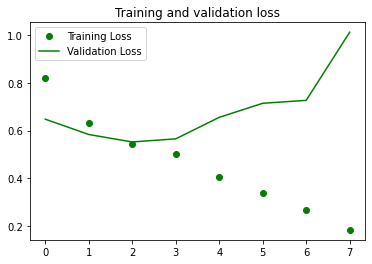

In [ ]:
#히스토리 그래프
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, 'bo', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(loss, 'go', label='Training Loss')
plt.plot(val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 테스트 이미지 분류
import numpy as np
from keras.preprocessing import image

path = '/content/test_image.png'
img=image.load_img(path, target_size=(150, 150))
x=image.img_to_array(img)
# x.shape #(150, 150, 3)
x=np.expand_dims(x, axis=0)
x.shape #(1, 150, 150, 3)
classes = model.predict(x, batch_size=10)
print(classes[0])
if classes[0]>0:
    print(path + " is a dog")
else:
    print(path + " is a cat")

[1.]
/content/test_image.png is a dog


In [ ]:
# Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    class_mode='binary',
    batch_size=20
)
test_datagen = ImageDataGenerator(
    rescale = 1.0/255.)
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    class_mode='binary',
    batch_size=20
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 모델생성
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
# 모델 컴파일
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_generator,
                    validation_data=test_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2,
                    callbacks=[earlystopping])

Epoch 1/100
100/100 - 17s - loss: 0.8156 - accuracy: 0.5460 - val_loss: 0.6773 - val_accuracy: 0.6080 - 17s/epoch - 172ms/step
Epoch 2/100
100/100 - 16s - loss: 0.6968 - accuracy: 0.5815 - val_loss: 0.6464 - val_accuracy: 0.6800 - 16s/epoch - 164ms/step
Epoch 3/100
100/100 - 17s - loss: 0.6564 - accuracy: 0.6475 - val_loss: 0.6761 - val_accuracy: 0.5950 - 17s/epoch - 167ms/step
Epoch 4/100
100/100 - 17s - loss: 0.6355 - accuracy: 0.6445 - val_loss: 0.6695 - val_accuracy: 0.6310 - 17s/epoch - 173ms/step
Epoch 5/100
100/100 - 17s - loss: 0.6433 - accuracy: 0.6505 - val_loss: 0.5733 - val_accuracy: 0.6890 - 17s/epoch - 166ms/step
Epoch 6/100
100/100 - 16s - loss: 0.6095 - accuracy: 0.6655 - val_loss: 0.5777 - val_accuracy: 0.6850 - 16s/epoch - 163ms/step
Epoch 7/100
100/100 - 16s - loss: 0.6211 - accuracy: 0.6720 - val_loss: 0.5831 - val_accuracy: 0.6980 - 16s/epoch - 163ms/step
Epoch 8/100
100/100 - 16s - loss: 0.5987 - accuracy: 0.6770 - val_loss: 0.5476 - val_accuracy: 0.7140 - 16s/epo

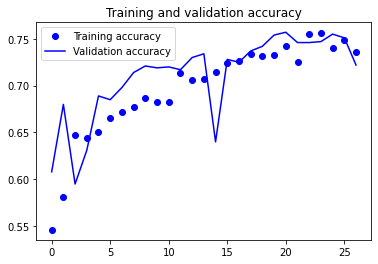

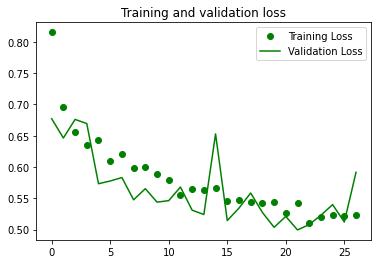

In [ ]:
#히스토리 그래프
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, 'bo', label='Training accuracy')
plt.plot(val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(loss, 'go', label='Training Loss')
plt.plot(val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()